In [9]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 5.0 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 5.6 MB/s eta 0:00:006.3 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn. metrics import f1_score


In [4]:
data = pd.read_pickle('hw3/train.pickle')

In [6]:
x_data = data['features'].reshape(data['features'].shape[0], -1)
y_data = data['labels']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [28]:
model = LogisticRegression(random_state=0, max_iter = 1500)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1500, random_state=0)

In [16]:
y_pred = model.predict(x_test)

будем использовать F1-метрику, она эффективнее accuracy(просто выведу для общего понимания), учитывает точность и полноту(совмещает recall и precision).
F1-мера = 2 * (Precision * Recall) / (Precision + Recall)

In [33]:
def f1(x, y):
    Precission = precision_score(x, y, average='macro')
    Recall = recall_score(x, y, average='macro')
    f1_m = 2 * (Precission * Recall) / (Precission + Recall)
    print(f1_m)

In [34]:
accuracy_score(y_test, y_pred)

0.9501149425287356

In [35]:
f1(y_test, y_pred)

0.9435891322593987


In [54]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


[[ 37   7   0 ...   0   0   0]
 [  1 466  14 ...   0   0   0]
 [  1   8 472 ...   0   0   0]
 ...
 [  0   0   0 ...  72   0   0]
 [  0   0   0 ...   0  46   1]
 [  0   0   0 ...   0   0  53]]


In [57]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 913.8 kB/s eta 0:00:001m762.1 kB/s eta 0:00:01


In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [65]:
non_diagonal = np.where(~np.eye(matrix.shape[0], dtype=bool))
max_non_diagonal = np.max(matrix[non_diagonal_indices])
max_non_diagonal

16

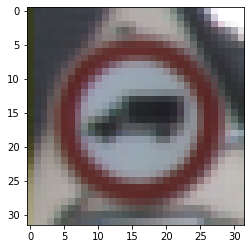

In [66]:
plt.imshow(data['features'][data['labels'] == 16][0])


16, движение грузовых транспортов запрещено.

In [68]:
badneighbor = KNeighborsClassifier()
badneighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [77]:
nbk = MultinomialNB()
nbk.fit(x_train, y_train)

MultinomialNB()

In [69]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [70]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train, y_train)

SVC()

In [71]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [80]:
y_pred_knn = badneighbor.predict(x_test)
f1(y_test, y_pred_knn)


0.8823212147296204


In [79]:
y_pred_nbk = nbk.predict(x_test)
f1(y_test, y_pred_nbk)

0.3844515268793265


In [83]:
y_pred_svc_first = svc_linear.predict(x_test)
f1(y_test, y_pred_svc_first)

0.9515568586332708


In [84]:
y_pred_svc_second = svc_rbf.predict(x_test)
f1(y_test, y_pred_svc_second)

0.8774876662717789


In [85]:
y_pred_svc_third = svc_poly.predict(x_test)
f1(y_test, y_pred_svc_third)

0.7570021601187173


хуже всех отработал nbk, потому что в нём предполагается независимость фичей, а на изображениях пиксели зависимы.
лучше всех отработали линейный svc и логистическая.

In [88]:
print(accuracy_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_nbk))
print(accuracy_score(y_test, y_pred_svc_first))
print(accuracy_score(y_test, y_pred_svc_second))
print(accuracy_score(y_test, y_pred_svc_third))

0.8733333333333333
0.32701149425287357
0.9575862068965517
0.871264367816092
0.6989655172413793
